In [1]:
import pandas as pd
import numpy as np

from pycaret.classification import *

import sklearn.preprocessing as pp 

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
def numerical_plot(data, col, title, simb, ylabel, color):
    fig, ax = plt.subplots(
        2, 1,
        sharex= True,
        figsize= (20, 8),
        facecolor= "#FFFFFF",
        gridspec_kw= {"height_ratios": (.2, .8)}
    )
    
    ax[0].set_facecolor("#FFFFFF")
    ax[1].set_facecolor("#FFFFFF")
    
    ax[0].set_title(
        title,
        weight= "bold",
        fontsize= 30,
        pad= 30,
    )
    
    sns.boxplot(
        x= col,
        data= data,
        color= color,
        ax= ax[0],
    )
    
    ax[0].set(yticks= [])
    
    sns.distplot(data[col], kde= True, color= color)
    
    plt.xticks(weight= "bold", fontsize= 10)
    plt.yticks(weight= "bold", fontsize= 10)
    
    ax[0].set_xlabel(col, weight= "bold", fontsize= 15, labelpad= 15)
    ax[1].set_xlabel(col, weight= "bold", fontsize= 15)
    ax[1].set_ylabel(ylabel, weight= "bold", fontsize= 15)
    
    plt.axvline(
        data[col].mean(),
        color= "darkblue",
        linewidth= 2.2,
        label= "mean=" + str(np.round(data[col].mean(), 1)) + simb,
    )
    
    plt.axvline(
        data[col].median(),
        color= "red",
        linewidth= 2.2,
        label= "median=" + str(np.round(data[col].median(), 1)) + simb,
    )
    
    plt.axvline(
        data[col].max(),
        color= "blue",
        linewidth= 2.2, 
        label= "max=" + str(np.round(data[col].max(), 1)) + simb,
    )
    
    plt.axvline(
        data[col].min(), 
        color= "orange", 
        linewidth= 2.2, 
        label= "min=" + str(np.round(data[col].min(), 1)) + simb,
    ) 
    plt.axvline(
        data[col].mode()[0], 
        color= "purple", 
        linewidth= 2.2, 
        label= "mode=" + str(data[col].mode()[0]) + simb,
    )
    
    plt.legend(
        bbox_to_anchor= (1, 1),
        ncol= 1,
        fontsize= 17,
        fancybox= True,
        shadow= True,
        frameon= False,
    )
    
    plt.tight_layout()
    plt.show()

In [3]:
df = pd.read_csv('Clicked Ads Dataset.csv', sep=',')

In [4]:
df.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
540,540,77.47,36,493574130.0,222.91,Laki-Laki,3/14/2016 3:29,No,Bandung,Jawa Barat,Otomotif
769,769,85.54,27,341327980.0,175.43,Laki-Laki,3/31/2016 13:54,No,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Furniture
544,544,76.59,29,472688440.0,211.64,Perempuan,6/18/2016 5:17,No,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Otomotif
665,665,58.05,32,111153700.0,195.54,Laki-Laki,2/12/2016 10:39,Yes,Serang,Banten,House
463,463,36.49,52,294954310.0,196.61,Laki-Laki,3/9/2016 0:41,Yes,Serang,Banten,Fashion


## Data Preparation

In [5]:
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [6]:
df.shape

(1000, 10)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [9]:
df[['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage', 'Male']].describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,NaN,NaN,NaN,64.929524,15.844699,32.6,51.27,68.11,78.46,91.43
Area Income,987.0,NaN,NaN,NaN,384864670.638298,94079989.569259,97975500.0,328632990.0,399068320.0,458355450.0,556393600.0
Daily Internet Usage,989.0,NaN,NaN,NaN,179.86362,43.870142,104.78,138.71,182.65,218.79,267.01
Male,997,2,Perempuan,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_cleaned = df.dropna()

In [11]:
df_cleaned.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  963 non-null    float64
 1   Age                       963 non-null    int64  
 2   Area Income               963 non-null    float64
 3   Daily Internet Usage      963 non-null    float64
 4   Male                      963 non-null    object 
 5   Timestamp                 963 non-null    object 
 6   Clicked on Ad             963 non-null    object 
 7   city                      963 non-null    object 
 8   province                  963 non-null    object 
 9   category                  963 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 82.8+ KB


In [13]:
df_cleaned['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  963 non-null    float64       
 1   Age                       963 non-null    int64         
 2   Area Income               963 non-null    float64       
 3   Daily Internet Usage      963 non-null    float64       
 4   Male                      963 non-null    object        
 5   Timestamp                 963 non-null    datetime64[ns]
 6   Clicked on Ad             963 non-null    object        
 7   city                      963 non-null    object        
 8   province                  963 non-null    object        
 9   category                  963 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 82.8+ KB


In [15]:
df_cleaned['Year'] = df_cleaned['Timestamp'].dt.year
df_cleaned['Month'] = df_cleaned['Timestamp'].dt.month
df_cleaned['Day'] = df_cleaned['Timestamp'].dt.day
df_cleaned['Hour'] = df_cleaned['Timestamp'].dt.hour

In [16]:
df_cleaned.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Day,Hour
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,3,27,0
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,2016,4,4,1
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,2016,3,13,20
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,2016,1,10,2
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,2016,6,3,3


## EDA

In [17]:
clicked = df_cleaned[df_cleaned['Clicked on Ad'] == 'Yes']
not_clicked = df_cleaned[df_cleaned['Clicked on Ad'] == 'No']

In [18]:
def describe_stats(column):
    print(f"\nDeskripsi statistik untuk {column}:")
    print("User yang mengklik iklan:")
    print(clicked[column].describe())
    print("\nUser yang tidak mengklik iklan:")
    print(not_clicked[column].describe())

### Univariate Analysis

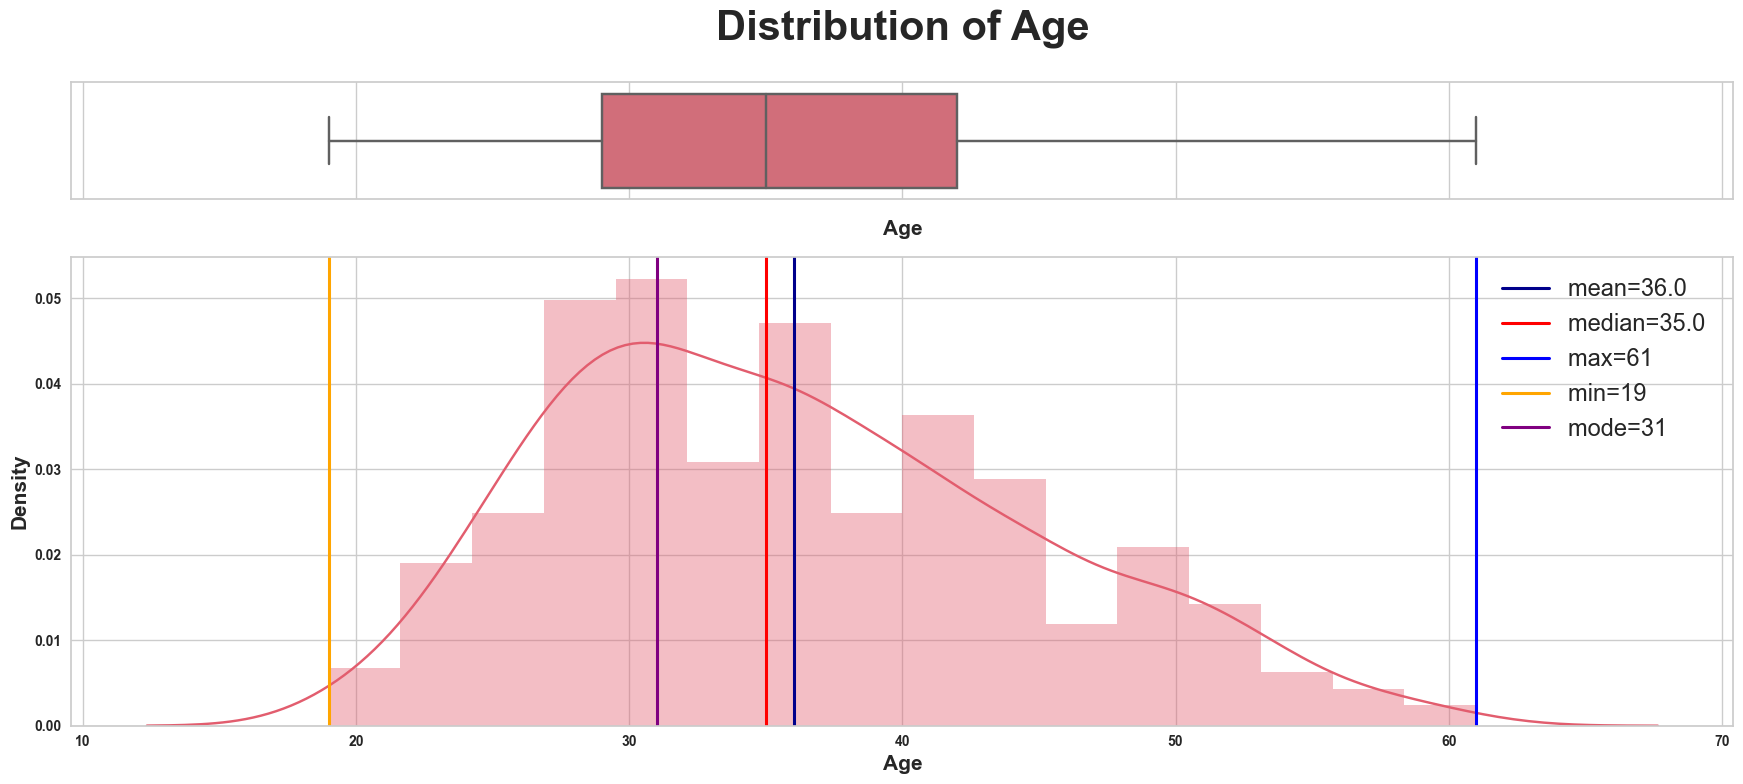

In [19]:
numerical_plot(
    data= df_cleaned,
    col= "Age",
    title= "Distribution of Age",
    simb= " ",
    ylabel= "Density",
    color= "#e25d6e",
)


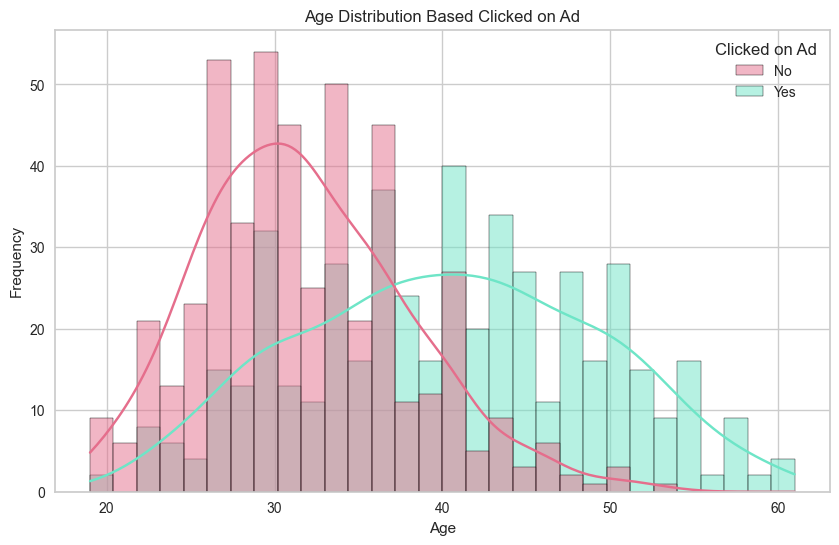

In [20]:
colors=['#e56e8c', '#6ee5c7']
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Age', bins=30, common_norm=False, kde=True, palette=colors, hue='Clicked on Ad')
plt.title("Age Distribution Based Clicked on Ad")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [21]:
describe_stats('Age')


Deskripsi statistik untuk Age:
User yang mengklik iklan:
count    485.000000
mean      40.327835
std        8.829991
min       19.000000
25%       34.000000
50%       40.000000
75%       47.000000
max       61.000000
Name: Age, dtype: float64

User yang tidak mengklik iklan:
count    478.000000
mean      31.709205
std        6.189289
min       19.000000
25%       27.000000
50%       31.000000
75%       36.000000
max       53.000000
Name: Age, dtype: float64


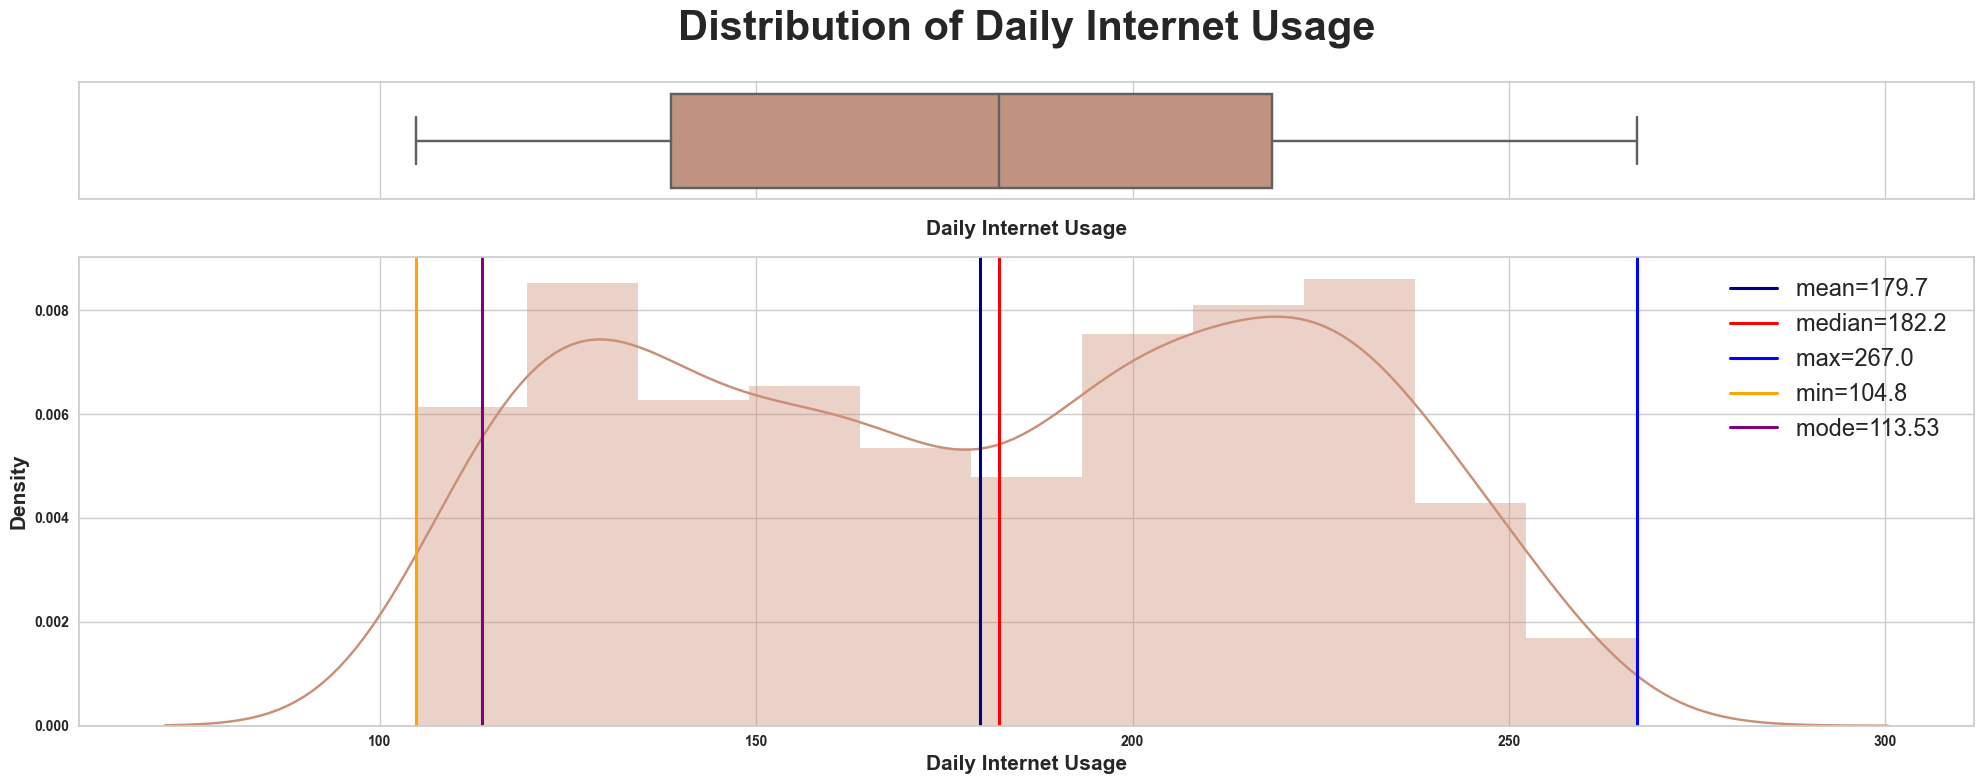

In [22]:
numerical_plot(
    data= df_cleaned,
    col= "Daily Internet Usage",
    title= "Distribution of Daily Internet Usage",
    simb= " ",
    ylabel= "Density",
    color= "#cb8f76",
)


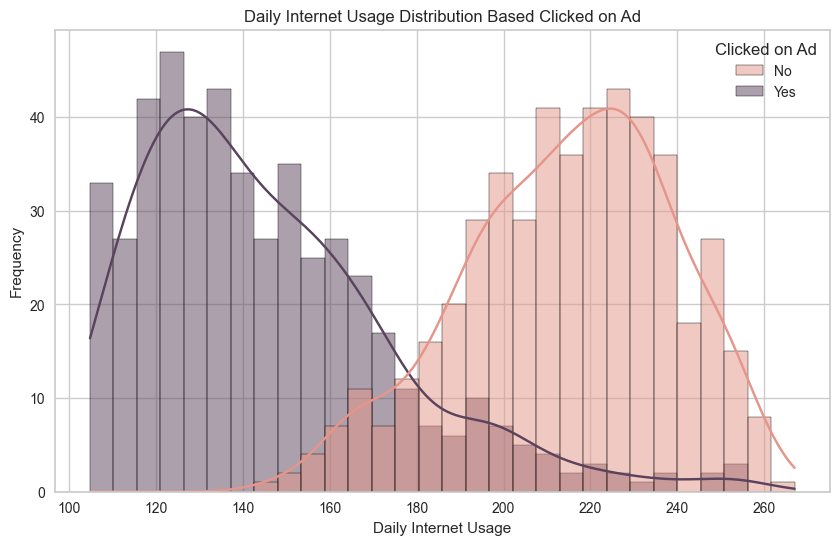

In [23]:
colors=['#e59589', '#5a435c']
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Daily Internet Usage', bins=30, common_norm=False, kde=True, palette=colors, hue='Clicked on Ad')
plt.title("Daily Internet Usage Distribution Based Clicked on Ad")
plt.xlabel("Daily Internet Usage")
plt.ylabel("Frequency")
plt.show()

In [24]:
describe_stats('Daily Internet Usage')


Deskripsi statistik untuk Daily Internet Usage:
User yang mengklik iklan:
count    485.000000
mean     145.222330
std       29.254824
min      104.780000
25%      123.640000
50%      138.710000
75%      160.740000
max      255.570000
Name: Daily Internet Usage, dtype: float64

User yang tidak mengklik iklan:
count    478.000000
mean     214.715021
std       23.985000
min      146.190000
25%      198.515000
50%      216.535000
75%      231.895000
max      267.010000
Name: Daily Internet Usage, dtype: float64


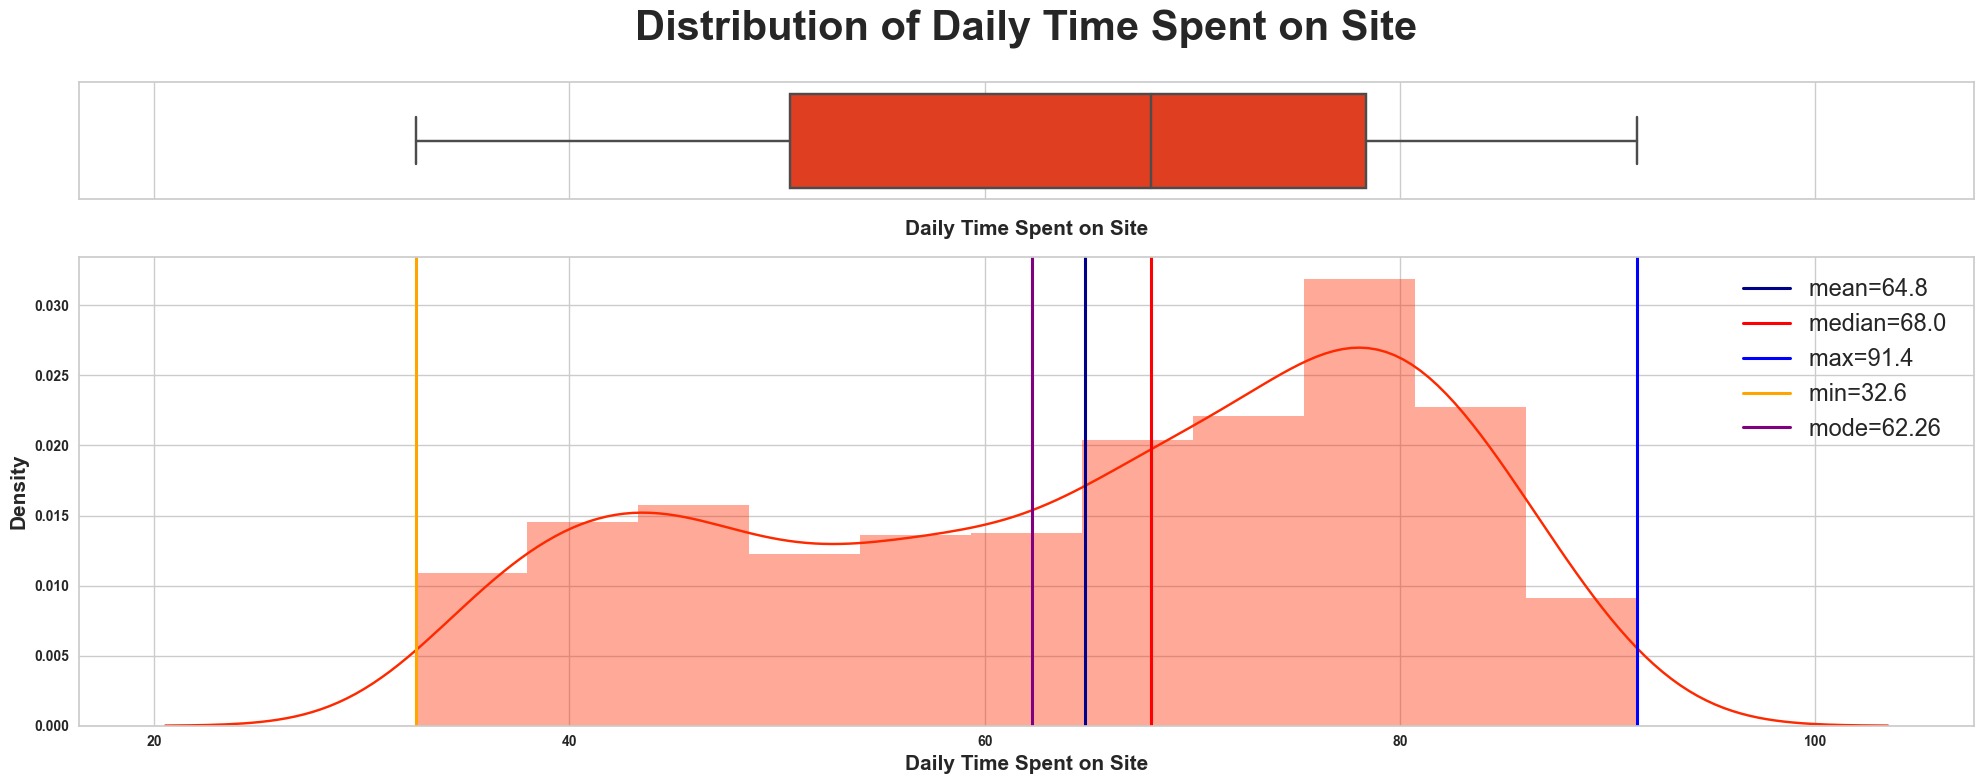

In [25]:
numerical_plot(
    data= df_cleaned,
    col= "Daily Time Spent on Site",
    title= "Distribution of Daily Time Spent on Site",
    simb= " ",
    ylabel= "Density",
    color= "#ff2900",
)

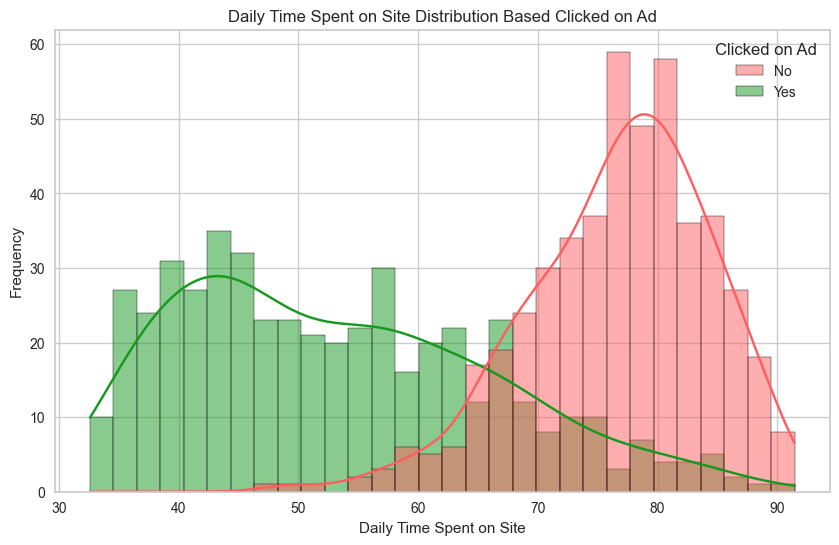

In [26]:
colors=['#ff5e61', '#15991e']
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Daily Time Spent on Site', bins=30, common_norm=False, kde=True, palette=colors, hue='Clicked on Ad')
plt.title("Daily Time Spent on Site Distribution Based Clicked on Ad")
plt.xlabel("Daily Time Spent on Site")
plt.ylabel("Frequency")
plt.show()

In [27]:
describe_stats('Daily Time Spent on Site')


Deskripsi statistik untuk Daily Time Spent on Site:
User yang mengklik iklan:
count    485.000000
mean      53.093258
std       12.933183
min       32.600000
25%       42.600000
50%       50.870000
75%       62.140000
max       91.370000
Name: Daily Time Spent on Site, dtype: float64

User yang tidak mengklik iklan:
count    478.000000
mean      76.737008
std        7.582513
min       48.220000
25%       72.040000
50%       77.555000
75%       81.987500
max       91.430000
Name: Daily Time Spent on Site, dtype: float64


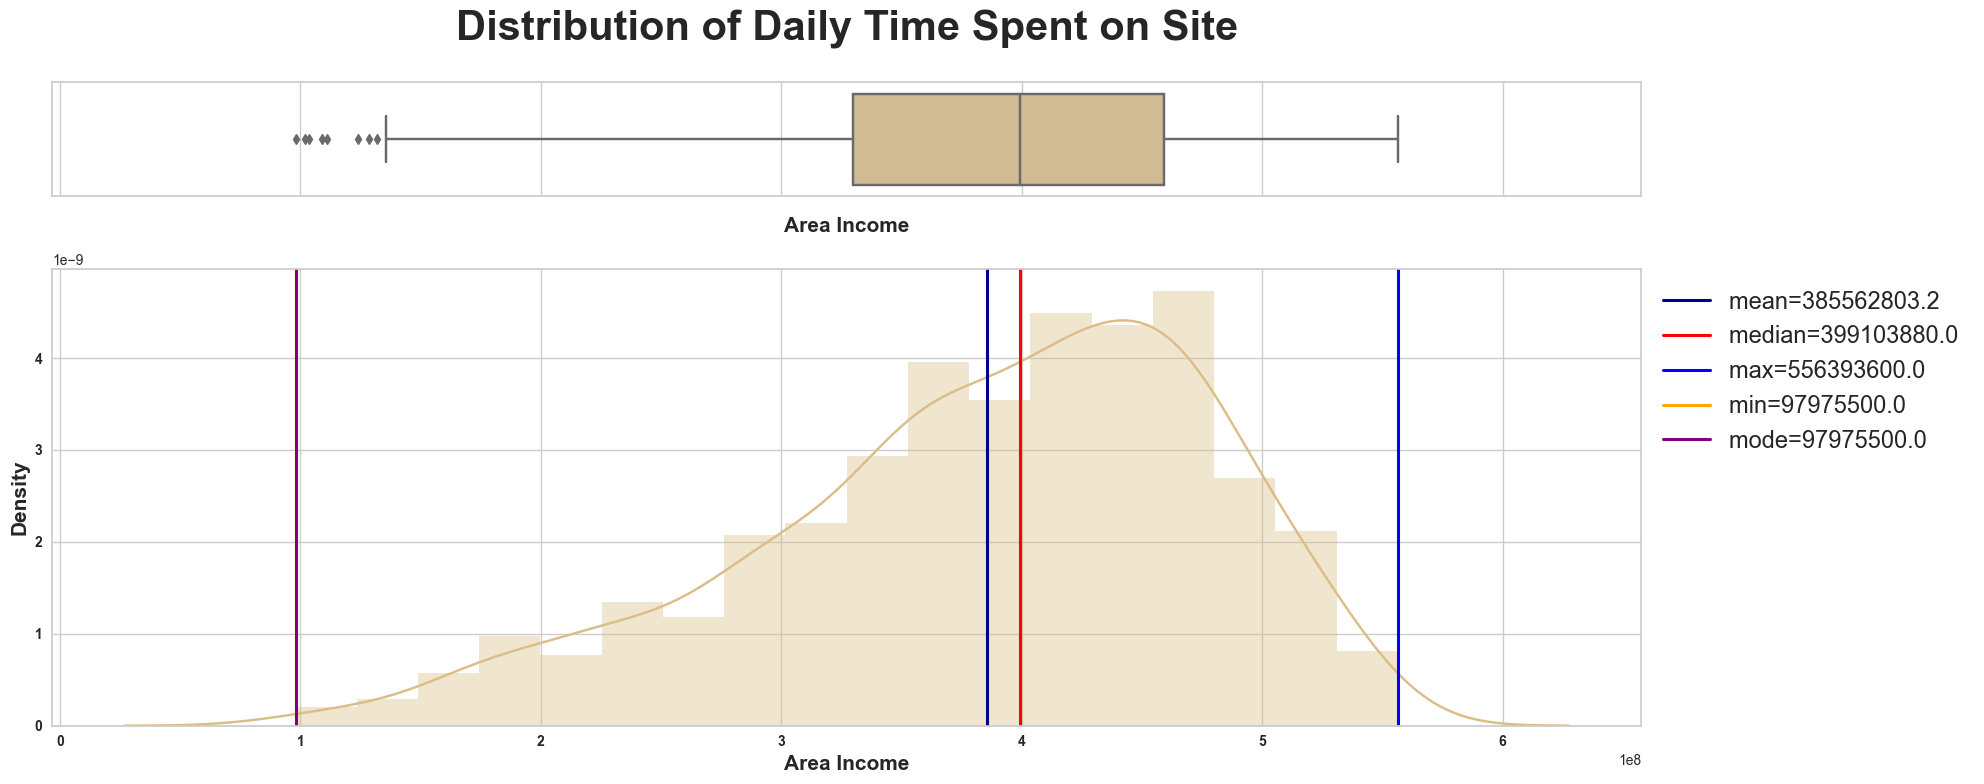

In [28]:
numerical_plot(
    data= df_cleaned,
    col= "Area Income",
    title= "Distribution of Daily Time Spent on Site",
    simb= " ",
    ylabel= "Density",
    color= "#dbbe87",
)

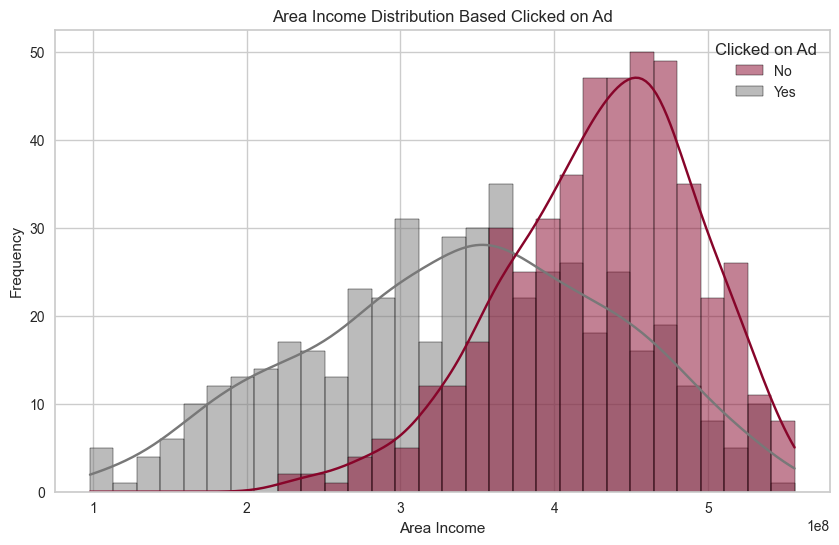

In [29]:
colors=['#87052a', '#787878']
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Area Income', bins=30, common_norm=False, kde=True, palette=colors, hue='Clicked on Ad')
plt.title("Area Income Distribution Based Clicked on Ad")
plt.xlabel("Area Income")
plt.ylabel("Frequency")
plt.show()

In [30]:
describe_stats('Area Income')


Deskripsi statistik untuk Area Income:
User yang mengklik iklan:
count    4.850000e+02
mean     3.413867e+08
std      9.862940e+07
min      9.797550e+07
25%      2.743542e+08
50%      3.466776e+08
75%      4.157852e+08
max      5.496469e+08
Name: Area Income, dtype: float64

User yang tidak mengklik iklan:
count    4.780000e+02
mean     4.303859e+08
std      6.227218e+07
min      2.326744e+08
25%      3.898926e+08
50%      4.371729e+08
75%      4.732477e+08
max      5.563936e+08
Name: Area Income, dtype: float64


### Bivariate Analysis

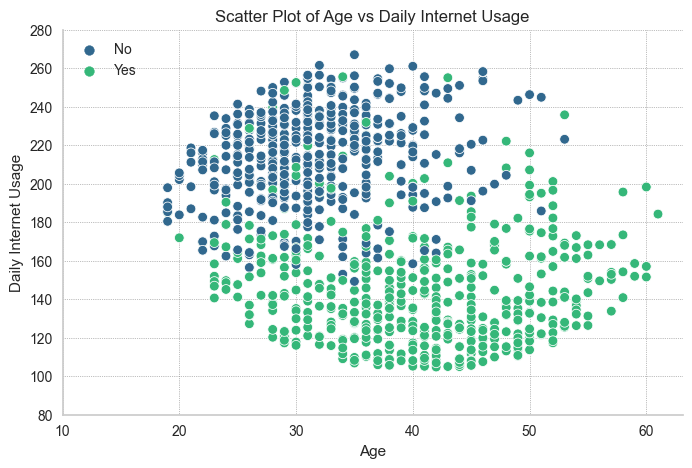

In [31]:
plt.figure(figsize=(8, 5))

sns.scatterplot(data=df_cleaned, x='Age', y='Daily Internet Usage', hue='Clicked on Ad', palette='viridis')

y_tick_label, location = plt.yticks()
plt.yticks(y_tick_label, (y_tick_label/1).astype(int))

plt.xlim(xmin=10)
plt.ylim(ymin=80)

plt.title('Scatter Plot of Age vs Daily Internet Usage')
plt.xlabel('Age')
plt.ylabel('Daily Internet Usage')

plt.grid(True, linewidth=0.5, linestyle=':', color='gray')

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.legend(loc=2)

plt.show()

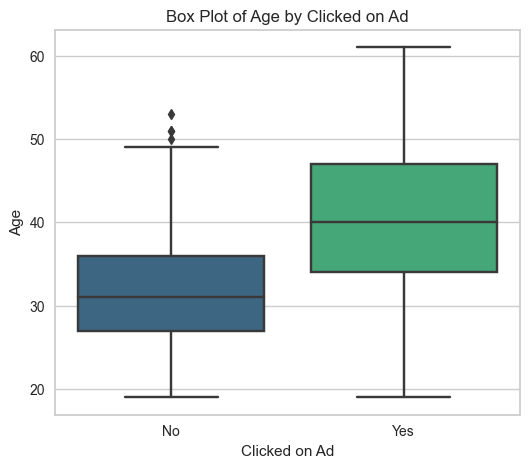

In [32]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Clicked on Ad', y='Age', data=df_cleaned, palette='viridis')
plt.title('Box Plot of Age by Clicked on Ad')
plt.xlabel('Clicked on Ad')
plt.ylabel('Age')
plt.show()


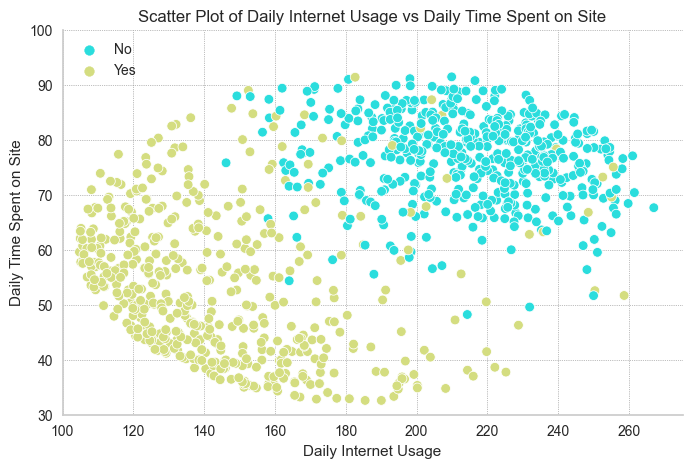

In [33]:
plt.figure(figsize=(8, 5))

sns.scatterplot(data=df, y='Daily Time Spent on Site', x='Daily Internet Usage', hue='Clicked on Ad', palette='rainbow')

y_tick_label, location = plt.yticks()
plt.yticks(y_tick_label, (y_tick_label/1).astype(int))

plt.xlim(xmin=100)
plt.ylim(ymin=30)

plt.title('Scatter Plot of Daily Internet Usage vs Daily Time Spent on Site')
plt.ylabel('Daily Time Spent on Site')
plt.xlabel('Daily Internet Usage')

plt.grid(True, linewidth=0.5, linestyle=':', color='gray')

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.legend(loc=2)

plt.show()

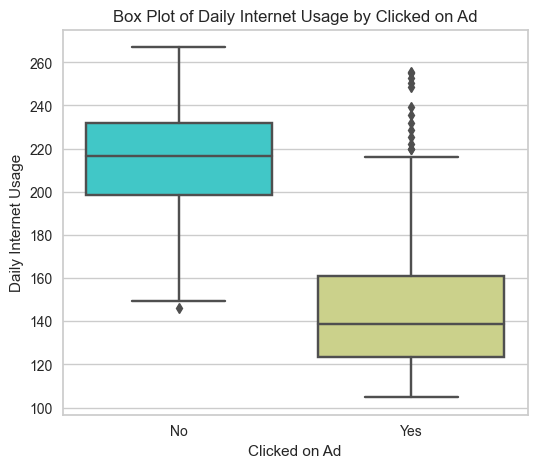

In [34]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Clicked on Ad', y='Daily Internet Usage', data=df_cleaned, palette='rainbow')
plt.title('Box Plot of Daily Internet Usage by Clicked on Ad')
plt.xlabel('Clicked on Ad')
plt.ylabel('Daily Internet Usage')
plt.show()


In [35]:
clicked['Year'] = clicked['Timestamp'].dt.year
clicked['Month'] = clicked['Timestamp'].dt.month
clicked['Day'] = clicked['Timestamp'].dt.day
not_clicked['Day'] = not_clicked['Timestamp'].dt.day
clicked['Hour'] = clicked['Timestamp'].dt.hour
not_clicked['Hour'] = not_clicked['Timestamp'].dt.hour
clicked['Minute'] = clicked['Timestamp'].dt.minute

In [36]:
clicked_per_day = clicked.groupby(['Day']).size().reset_index()
no_clicked_per_day = not_clicked.groupby(['Day']).size().reset_index()

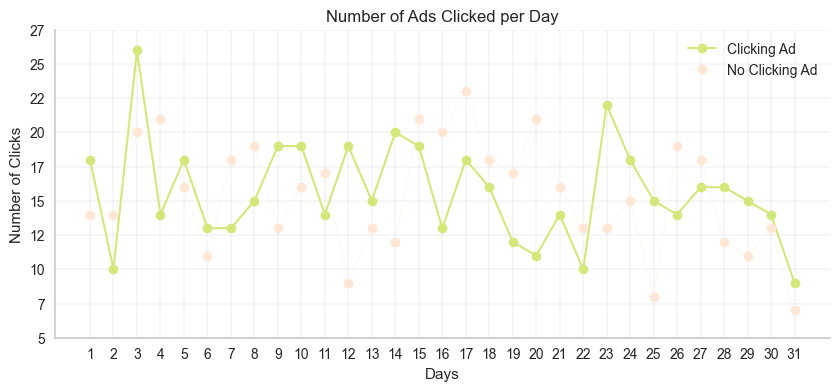

In [37]:
plt.figure(figsize=(10, 4))

plt.plot(clicked_per_day['Day'], clicked_per_day[0], marker='o', linewidth=1.5, color='#d2e87a', label='Clicking Ad')
plt.plot(no_clicked_per_day['Day'], no_clicked_per_day[0], marker='o', linewidth=.25, color='#ffe6d5', label='No Clicking Ad')

plt.grid(linestyle='-', linewidth=0.1, color='grey')
plt.xticks(rotation=0)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

y_tick_label,location = plt.yticks()
plt.yticks(y_tick_label, (y_tick_label*1).astype(int))

plt.title('Number of Ads Clicked per Day')
plt.xlabel('Days')
plt.ylabel('Number of Clicks')

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.legend()

plt.show()

In [38]:
clicks_per_hour = clicked.groupby('Hour').size().reset_index()
no_clicks_per_hour = not_clicked.groupby('Hour').size().reset_index()

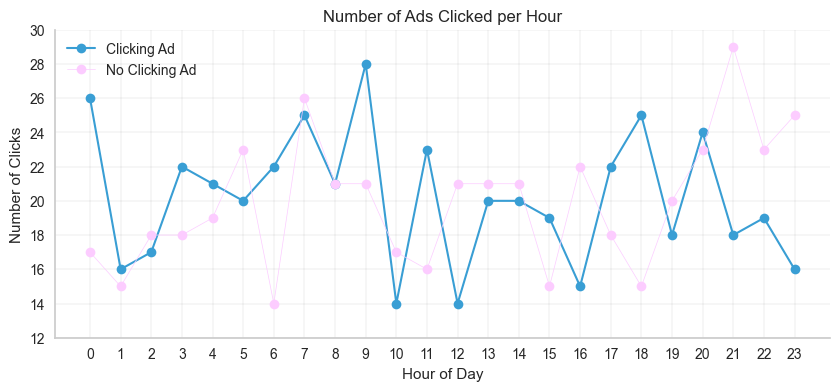

In [39]:
plt.figure(figsize=(10, 4))

plt.plot(clicks_per_hour['Hour'], clicks_per_hour[0], marker='o', linewidth=1.5, color='#399ed4', label='Clicking Ad')
plt.plot(no_clicks_per_hour['Hour'], no_clicks_per_hour[0], marker='o', linewidth=.5, color='#fcccff', label='No Clicking Ad')

plt.grid(linestyle='-', linewidth=0.1, color='grey')
plt.xticks(rotation=0)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

y_tick_label,location = plt.yticks()
plt.yticks(y_tick_label, (y_tick_label*1).astype(int))

plt.title('Number of Ads Clicked per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Clicks')

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.legend()

plt.show()

### Multivariate Analysis

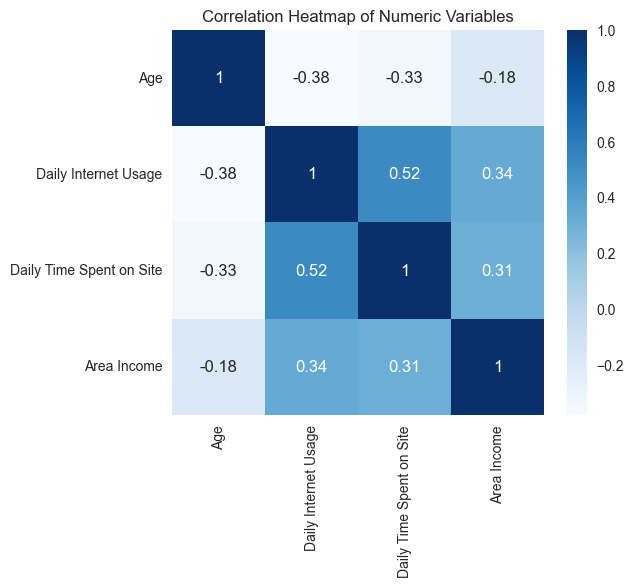

In [40]:
numeric_vars = ['Age', 'Daily Internet Usage', 'Daily Time Spent on Site', 'Area Income']
correlation_matrix = df_cleaned[numeric_vars].corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [41]:
correlation_matrix

,Age,Daily Internet Usage,Daily Time Spent on Site,Area Income
Age,1.000000,-0.378976,-0.332624,-0.182689
Daily Internet Usage,-0.378976,1.000000,0.519289,0.335894
Daily Time Spent on Site,-0.332624,0.519289,1.000000,0.305855
Area Income,-0.182689,0.335894,0.305855,1.000000


## Feature Engineering

In [42]:
province_to_island = {
    'Daerah Khusus Ibukota Jakarta': 'Jawa',
    'Jawa Barat': 'Jawa',
    'Jawa Timur': 'Jawa',
    'Banten': 'Jawa',
    'Jawa Tengah': 'Jawa',
    'Sumatra Utara': 'Sumatra',
    'Sumatra Selatan': 'Sumatra',
    'Kepulauan Riau': 'Sumatra',
    'Kalimantan Timur': 'Kalimantan',
    'Lampung': 'Sumatra',
    'Sulawesi Selatan': 'Sulawesi',
    'Kalimantan Selatan': 'Kalimantan',
    'Riau': 'Sumatra',
    'Bali': 'Bali',
    'Sumatra Barat': 'Sumatra',
    'Kalimantan Barat': 'Kalimantan'
}

df_cleaned['Island'] = df_cleaned['province'].map(province_to_island)

In [43]:
df_cleaned['Target'] = df_cleaned['Clicked on Ad'].replace({'No':0, 'Yes':1})
df_cleaned['Gender'] = df_cleaned['Male'].replace({'Perempuan':0, 'Laki-Laki':1})

In [49]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Island', 'category'])

In [54]:
dummy_columns = [col for col in df_cleaned.columns if 'Island_' in col or 'category_' in col]

df_cleaned[dummy_columns] = df_cleaned[dummy_columns].astype(int)

In [56]:
bins = [10, 30, 40, 50, 100]
labels = ['10-30', '30-40', '40-50', '50-100']

df_cleaned['Age_bin'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)

In [57]:
le = pp.LabelEncoder()
df_cleaned['Age_Bin_Code'] = le.fit_transform(df_cleaned['Age_bin'])

In [58]:
bins = [0, 179, 400]
labels = ['0-179', '179-400']

df_cleaned['daily_internet_usage_bin'] = pd.cut(df_cleaned['Daily Internet Usage'], bins=bins, labels=labels, right=False)

In [59]:
df_cleaned['daily_internet_usage_code'] = df_cleaned['daily_internet_usage_bin'].replace({'0-179':0, '179-400':1})

In [93]:
df_cleaned['daily_internet_usage_code'] = df_cleaned['daily_internet_usage_code'].astype(int)

In [61]:
bins = [0, 65, 200]
labels = ['0-65', '65-200']

df_cleaned['daily_time_spent_on_site_bin'] = pd.cut(df_cleaned['Daily Time Spent on Site'], bins=bins, labels=labels, right=False)

In [62]:
df_cleaned['daily_time_spent_on_site_code'] = df_cleaned['daily_time_spent_on_site_bin'].replace({'0-65':0, '65-200':1})

In [94]:
df_cleaned['daily_time_spent_on_site_code'] = df_cleaned['daily_time_spent_on_site_code'].astype(int)

In [63]:
bins = [0, 2e8, 3e8, 4e8, 8e8]
labels = ['0-2e8', '2e8-3e8', '3e8-4e8', '4e8-8e8']

df_cleaned['Income_Bin'] = pd.cut(df_cleaned['Area Income'], bins=bins, labels=labels, right=False)

In [64]:
df_cleaned['income_code'] = le.fit_transform(df_cleaned['Income_Bin'])

## Feature Selection

In [95]:
num_cols = df_cleaned.select_dtypes(include=['int32', 'int64', 'float64'])
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Daily Time Spent on Site       963 non-null    float64
 1   Age                            963 non-null    int64  
 2   Area Income                    963 non-null    float64
 3   Daily Internet Usage           963 non-null    float64
 4   Year                           963 non-null    int32  
 5   Month                          963 non-null    int32  
 6   Day                            963 non-null    int32  
 7   Hour                           963 non-null    int32  
 8   Target                         963 non-null    int64  
 9   Gender                         963 non-null    int64  
 10  Island_Bali                    963 non-null    int32  
 11  Island_Jawa                    963 non-null    int32  
 12  Island_Kalimantan              963 non-null    int32  


In [70]:
#x = num_cols.drop(['Year', 'Month', 'Target'], axis=1)
#y = num_cols['Target']

## Modelling

In [71]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [114]:
"""
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
"""

Shape of x_train: (770, 24)
Shape of x_test: (193, 24)
Shape of y_train: (770,)
Shape of y_test: (193,)


In [96]:
feature_selected = num_cols.drop(['Year', 'Month'], axis=1)

In [158]:
exp = setup(
    data = feature_selected,
    target='Target',
    ignore_features=['Age_Bin_Code', 'income_code', 'daily_internet_usage_code', 'daily_time_spent_on_site_code'],
    remove_multicollinearity = False,
    feature_selection = False,
    normalize=True,
    normalize_method='robust',
    session_id=42,
    train_size=0.8
)

,Description,Value
0,Session id,42
1,Target,Target
2,Target type,Binary
3,Original data shape,"(963, 27)"
4,Transformed data shape,"(963, 23)"
5,Transformed train set shape,"(770, 23)"
6,Transformed test set shape,"(193, 23)"
7,Ignore features,4
8,Numeric features,22
9,Preprocess,True


In [159]:
best_model = compare_models(['lr', 'knn', 'svm', 'dt', 'rf', 'ada', 'nb'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9662,0.9872,0.9511,0.9816,0.9660,0.9325,0.9332,0.6490
rf,Random Forest Classifier,0.9597,0.9869,0.9486,0.9715,0.9595,0.9195,0.9204,0.0850
svm,SVM - Linear Kernel,0.9519,0.9845,0.9432,0.9633,0.9519,0.9039,0.9063,0.0160
ada,Ada Boost Classifier,0.9481,0.9794,0.9460,0.9517,0.9483,0.8961,0.8972,0.0540
knn,K Neighbors Classifier,0.9403,0.9745,0.8970,0.9833,0.9379,0.8806,0.8844,0.1460
nb,Naive Bayes,0.9403,0.9802,0.9382,0.9436,0.9406,0.8805,0.8811,0.0180
dt,Decision Tree Classifier,0.9260,0.9258,0.9252,0.9301,0.9267,0.8519,0.8536,0.0170


## Evaluasi Model

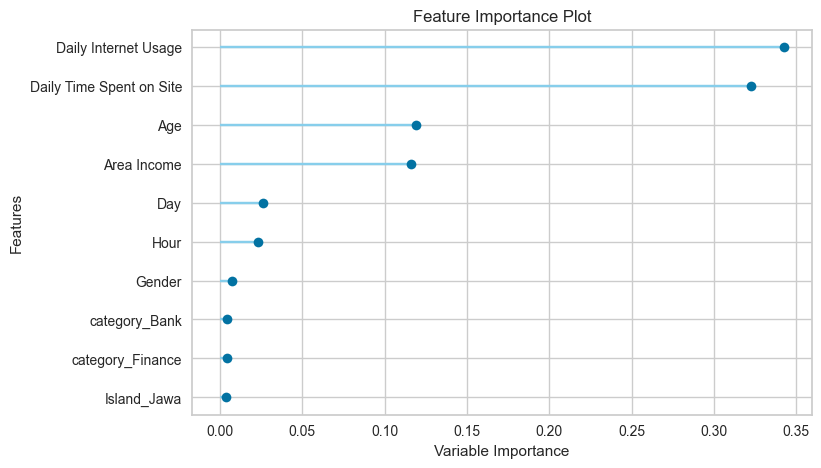

In [156]:
plot_model(best_model, plot='feature')

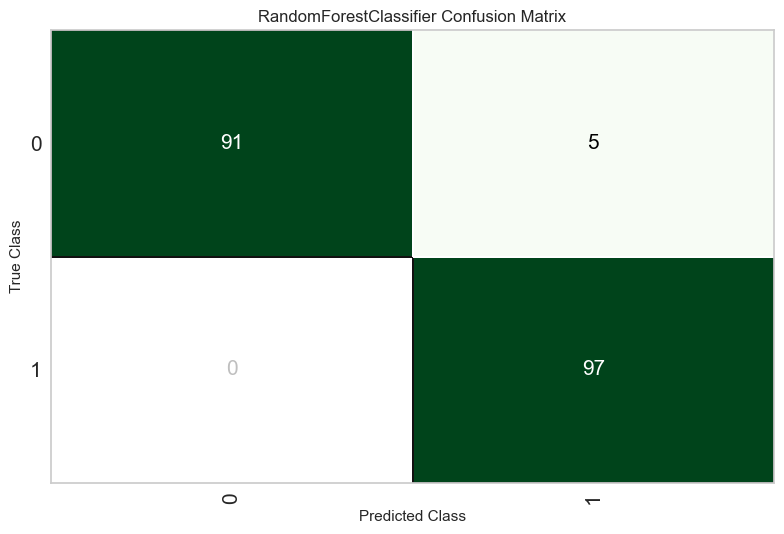

In [157]:
plot_model(best_model, plot='confusion_matrix')